In [135]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np



## 0. EDA (*)

In the whole exercise, we will work with the "mpg" dataset from seaborn dataset. Start by loading dataset "mpg" from the ```load_dataset``` method in seaborn module. The goal will be to use linear regression to predict mpg - miles per gallon. 

&nbsp; a) Start by doing some initial EDA such as info(), describe() and figure out what you want to do with the missing values.


In [136]:
df = sns.load_dataset("mpg")

In [137]:
# Importing and cleaning data
# Adding columns
df[["name", "test"]] = df["name"].str.split(
    " ", 1, expand=True
)  # Creating a new column
df.rename(
    columns={"name": "make", "test": "model"}, inplace=True
)  # Renaming columns
cars = df  # Creating a new dataframe

# Handling spelling mistakes:

# Renaming function
def func_rename(dataframe, oldname:str,  newname:str):
    """Function for renaming something in a dataframe, enter the dataframe, oldname and new name. """
    
    return dataframe["make"].replace(oldname, newname, inplace=True) # Renaming and returning the dataframe
#   The spelling mistakes were found by manually looking through the data.
#   func_rename can be found in the Functions.py file
func_rename(cars, "vw", "volkswagen"), func_rename(cars, "vokswagen", "volkswagen")
func_rename(cars, "chevy", "chevrolet"), func_rename(cars, "chevroelt", "chevrolet")
func_rename(cars, "maxda", "mazda"), func_rename(cars, "toyouta", "toyota")
func_rename(cars, "mercedes-benz", "mercedes"),

# Lets check if any data is missing.
cars.isna().sum()
np.where(cars.isna().any(axis=1))  # Checking for nans.
nanlist = [32, 126, 150, 330, 336, 346, 354, 374]  # The indexes for nan values.
for i in range(len(nanlist)):
    print(cars.iloc[nanlist[i]])  # Simple forloop to print out all nan rows.

# Total NaNs in dataframe is 8. 8/len(cars) ~ 2 %
# I find it acceptable to drop NaNs due to the value being so low. Would it be higher I would have to fill the data with the mean or ask the client for a complete sample

cars.dropna(inplace=True)

# I will also be dropping everything that is not numerical


mpg              25.0
cylinders           4
displacement     98.0
horsepower        NaN
weight           2046
acceleration     19.0
model_year         71
origin            usa
make             ford
model           pinto
Name: 32, dtype: object
mpg                 21.0
cylinders              6
displacement       200.0
horsepower           NaN
weight              2875
acceleration        17.0
model_year            74
origin               usa
make                ford
model           maverick
Name: 126, dtype: object
mpg               26.0
cylinders            4
displacement     108.0
horsepower        93.0
weight            2391
acceleration      15.5
model_year          74
origin           japan
make            subaru
model             None
Name: 150, dtype: object
mpg                     40.9
cylinders                  4
displacement            85.0
horsepower               NaN
weight                  1835
acceleration            17.3
model_year                80
origin                e

C:\Users\Agam\AppData\Local\Temp\ipykernel_13728\1975367176.py:3: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[["name", "test"]] = df["name"].str.split(


&nbsp; d) Check if there are any columns you might want to drop. 

In [138]:
# I will also be dropping everything that is not numerical
cars.drop("make", axis=1, inplace=True)
cars.drop("model",axis=1, inplace=True)
cars.drop("origin",axis=1, inplace=True)



&nbsp; b) Use describe only on those columns that are relevant to get statistical information from. 


In [139]:
cars["mpg"].describe(), cars["horsepower"].describe()

(count    390.000000
 mean      23.416667
 std        7.811030
 min        9.000000
 25%       17.000000
 50%       22.450000
 75%       29.000000
 max       46.600000
 Name: mpg, dtype: float64,
 count    390.000000
 mean     104.594872
 std       38.538599
 min       46.000000
 25%       75.250000
 50%       94.500000
 75%      128.000000
 max      230.000000
 Name: horsepower, dtype: float64)

&nbsp; c) Make some plots on some of the columns that you find interesting.


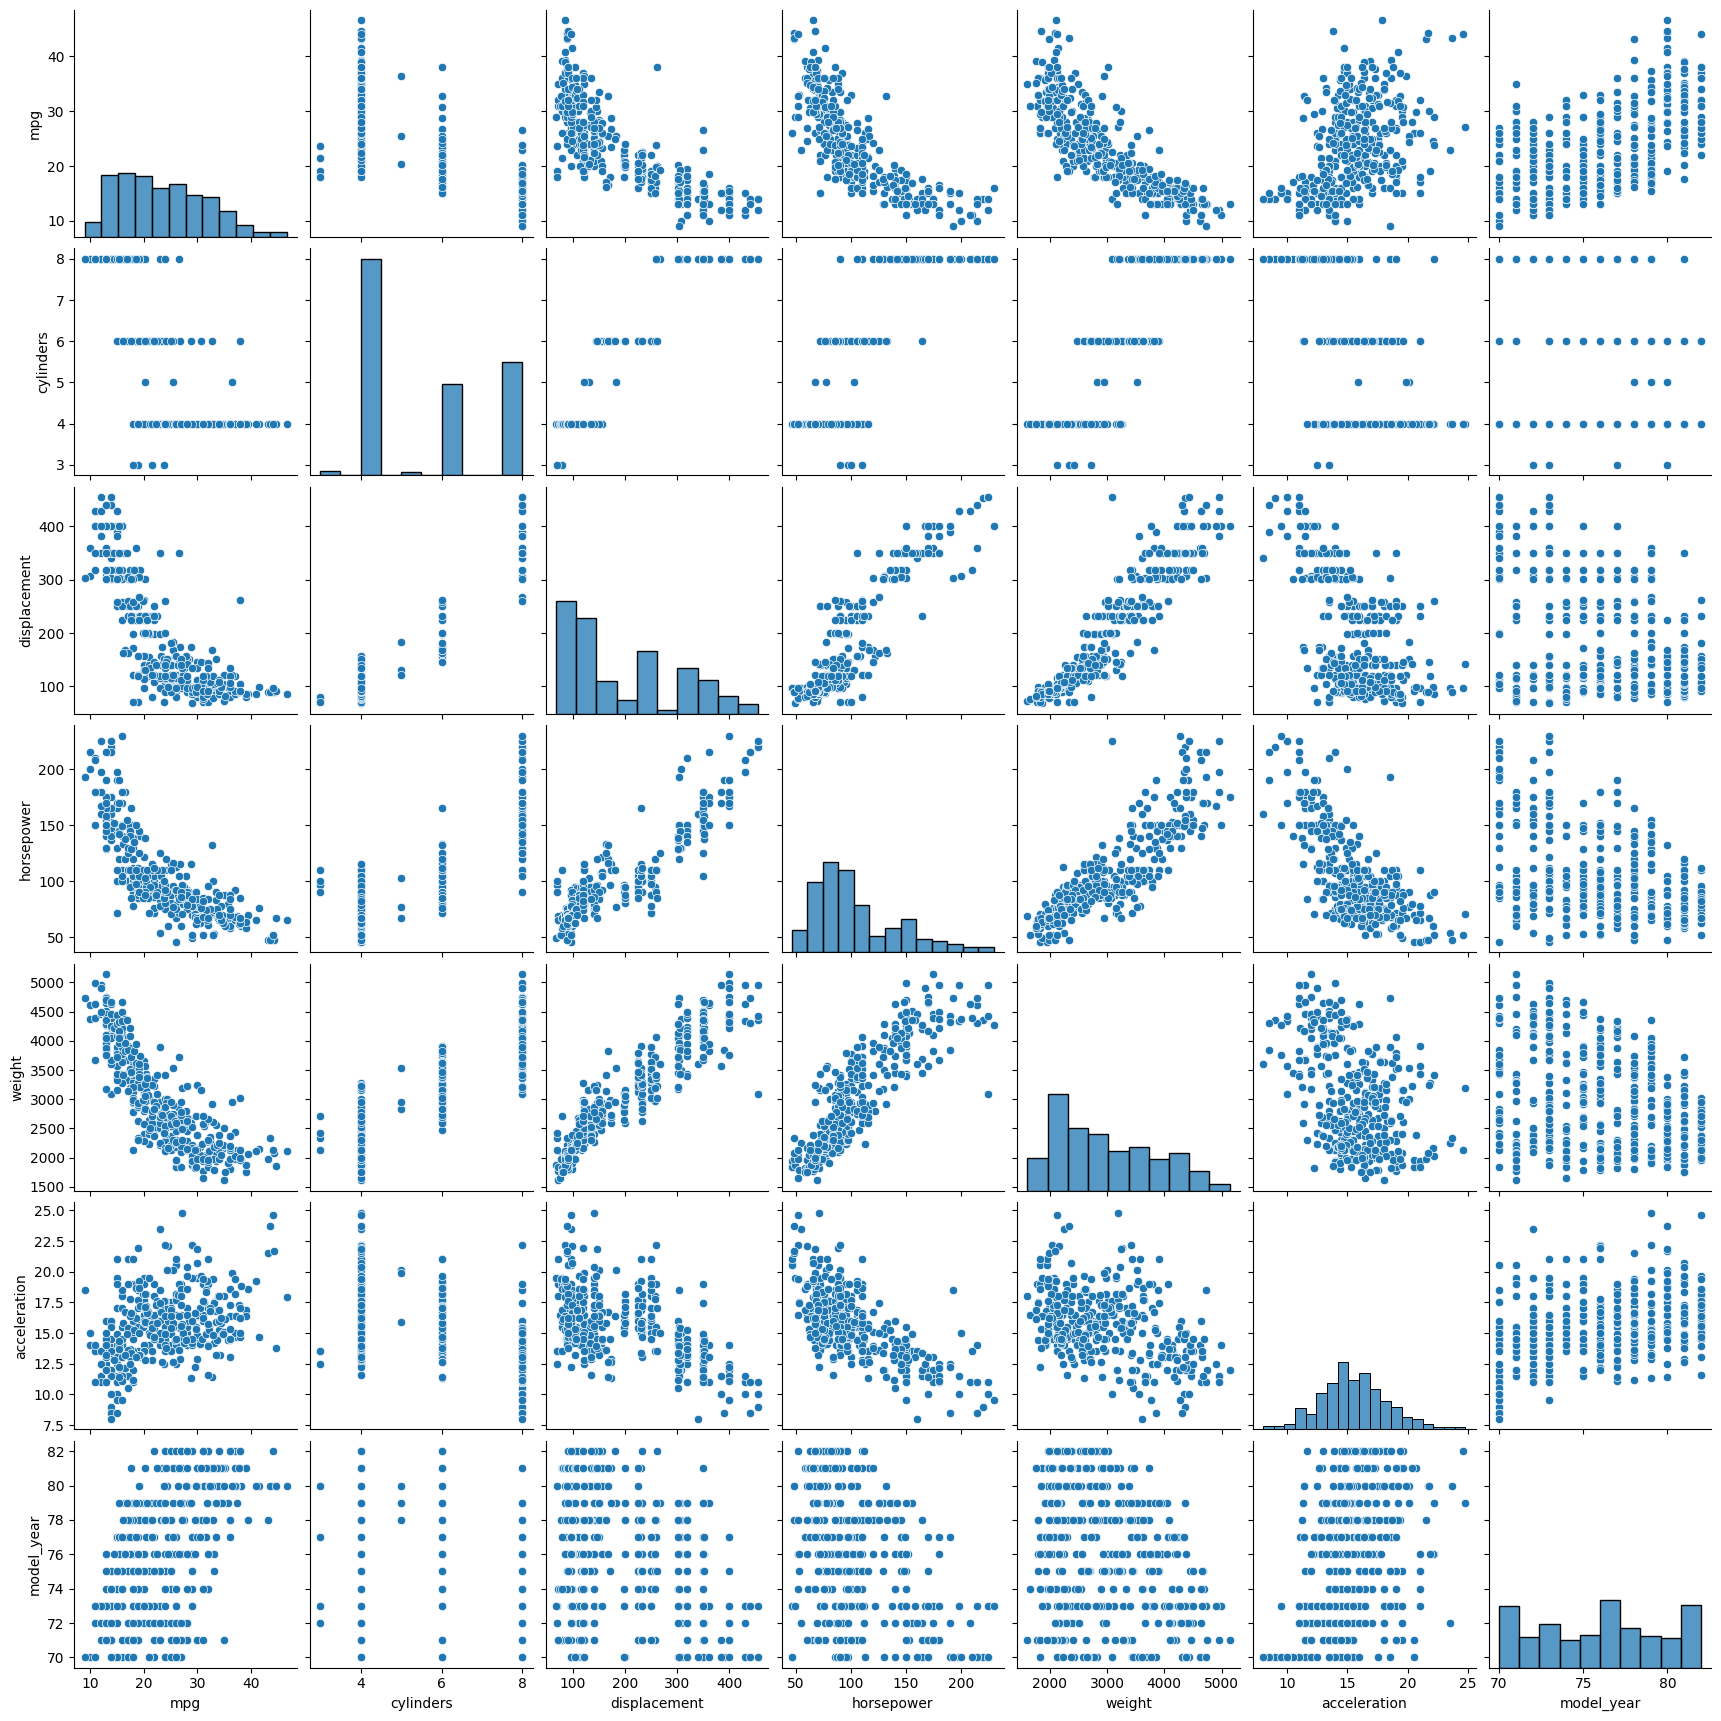

In [140]:
sns.pairplot(cars)

## 1. Train|test split (*)

We want to predict the "mpg", split up X and y, and perform train|test split using scikit-learn. Choose test_size of 0.2 and random_state 42. Control the shapes of each X_train, X_test, y_train, y_test.  

In [141]:
X, y = df.drop("mpg", axis=1), df["mpg"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape, X.shape, y.shape


((312, 6), (78, 6), (312,), (78,), (390, 6), (390,))

## 2. Function for evaluation (*)

Create a function for training a regression model, predicting and computing the metrics MAE, MSE, RMSE. It should take in parameters of X_train, X_test, y_train, y_test, model. Now create a linear regression model using scikit-learns ```LinearRegression()``` (OLS normal equation with SVD) and call your function to get metrics. 

In [142]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor
model = LinearRegression()

def eval_func(X_train, X_test, y_train, y_test, model):
   
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    MAE = mean_absolute_error(y_test, y_pred) # LOWER NUMBER BETTER
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    return MAE, MSE, RMSE

eval_func(X_train, X_test, y_train, y_test, model)

(2.8225695789275353, 13.252912285875826, 3.6404549558916157)

---
## 3. Compare models (*)

Create the following models 
- Linear regression (SVD)
- Linear regression (SVD) with scaled data (feature standardization)
- Stochastic gradient descent with scaled data (feature standardization)
- Polynomial linear regression with degree 1
- Polynomial linear regression with degree 2
- Polynomial linear regression with degree 3

Make a DataFrame with evaluation metrics and model. Which model performed overall best?

<details>

<summary>Answer</summary>

|      |   Linear regr. SVD |   Linear regr. SVD scaled |   Linear regr. SGD |   Polynom. regr. deg 1 |   Polynom. regr. deg 2 |   Polynom. regr. deg 3 |
|:-----|-------------------:|--------------------------:|-------------------:|-----------------------:|-----------------------:|-----------------------:|
| mae  |            2.50386 |                   2.50386 |            2.53515 |                2.50386 |                1.98048 |                2.11788 |
| mse  |           10.5024  |                  10.5024  |           10.8908  |               10.5024  |                7.41986 |                9.27353 |
| rmse |            3.24074 |                   3.24074 |            3.30012 |                3.24074 |                2.72394 |                3.04525 |

</details>

---

In [143]:
linreg = eval_func(X_train, X_test, y_train, y_test, model)

model_comp = pd.DataFrame()

model_comp["LinearRegression"] = linreg

model_comp


,LinearRegression
0,2.822570
1,13.252912
2,3.640455


In [144]:
# Linear regression with scaled data: 
from sklearn.preprocessing import MinMaxScaler

model = LinearRegression() # with scaled data. 

def eval_func(X_train, X_test, y_train, y_test, model):
   
    scaler = MinMaxScaler()
    scaler.fit(X_train) # important - use this for training data

    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model.fit(scaled_X_train, y_train)

    y_pred = model.predict(scaled_X_test)
    MAE = mean_absolute_error(y_test, y_pred) # LOWER NUMBER BETTER
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    return MAE, MSE, RMSE

eval_func(X_train, X_test, y_train, y_test, model)

(2.822569578927536, 13.252912285875823, 3.6404549558916153)

In [146]:
# Stochastic gradient descent with scaled data:
model_SGD = SGDRegressor(loss="squared_error", max_iter=10000, random_state= 42, learning_rate="adaptive")

def eval_func(X_train, X_test, y_train, y_test, model):
   
    scaler = MinMaxScaler() #scaler function.
    scaler.fit(X_train)

    scaled_X_train = scaler.transform(X_train)
    scaled_X_test = scaler.transform(X_test)

    model_SGD.fit(scaled_X_train, y_train)

    y_pred = model.predict(scaled_X_test)
    MAE = mean_absolute_error(y_test, y_pred) # LOWER NUMBER BETTER
    MSE = mean_squared_error(y_test, y_pred)
    RMSE = np.sqrt(MSE)
    return MAE, MSE, RMSE

eval_func(X_train, X_test, y_train, y_test, model_SGD)

(2.914174466001833, 14.233837591387768, 3.77277584695775)